**Student Performance Indicator**

**Life cycle of Machine Learning Project**


*   Understanding the problem statement
*   Data collection
*   Data checks to perform
*   Exploratory Data Analysis
*   Data Preprocessing
*   Model Training
*   Choose the best model  









**1.Problem Statement**

This project understands how the student's performance(test score) is affected by other variables such as Gender, Ethnicity, Parental level of Education, Lunch and Test preperation course.

**2.Data collection**

dataset source: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977



**2.1-Import data and required packages**

importing pandas, numpy, matplotlib, seaborn and warnings libraries



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import the csv data as pandas DataFrame

In [ ]:
df= pd.read_csv("/content/StudentsPerformance.csv")

Show the top and bottom 5 records

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


Shape of the dataset

In [ ]:
df.shape

(1000, 8)

dataset has 1000 rows and 8 columns

**2.2-Dataset information**

*   gender:- male/female
*   race/ethnicity:- enthnicity of student(Group A,B,C,D,E)
*   parental level of education	:- final education of parents   
*   lunch:- having lunch before test(standard or free/reduced)
*   test preperation course:- complete or not complete before test
*   math score
*   reading score
*   writting score


**3- Data checks to perform**



*   check missing values
*   check duplicates
*   check data type
*   check the number of unique values of each column
*   check statistics of data
*   check various categories present in the categorical columns



**3.1- check missing values**

In [ ]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values in dataset

**3.2 check duplicates**

In [ ]:
df.duplicated().sum()

0

There are no duplicate values in the dataset

**3.3Check data types**

In [ ]:
#check null and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


**3.4 checking the number of unique values for each column**

In [ ]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

**3.5check statistics of the data**

In [ ]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**Insights**

from the description, we can see that all means are very close to each other -- between 66 to 69

all standard deviations are also close -- between 14 to 15.19

min. score for math is 0, while for writting is much higher i.e 10 while for reading is highest i.e 17

**3.6 Exploring data**

In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
print("categories in gender:    ", end=" ")
print(df["gender"].unique())

print("categories in race/ethnicity:    ", end=" ")
print(df["race/ethnicity"].unique())

print("categories in parental level of education:   ", end=" ")
print(df["parental level of education"].unique())

print("categories in lunch:   ",end=" ")
print(df["lunch"].unique())

print("categories in test preperation course:    ", end=" ")
print(df["test preparation course"].unique())

categories in gender:     ['female' 'male']
categories in race/ethnicity:     ['group B' 'group C' 'group A' 'group D' 'group E']
categories in parental level of education:    ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in lunch:    ['standard' 'free/reduced']
categories in test preperation course:     ['none' 'completed']


In [ ]:
#define numerical and categorical columns
numerical_features = [feature for feature in df.columns if df[feature].dtype != "O"]
categorical_features = [feature for feature in df.columns if df[feature].dtype == "O"]

print("we have {} numerical columns: {} ".format(len(numerical_features),numerical_features))
print("we have {} categorical columns: {} ".format(len(categorical_features),categorical_features))

we have 5 numerical columns: ['math score', 'reading score', 'writing score', 'total score', 'average'] 
we have 5 categorical columns: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'] 


**Adding columns for "Total score" and "Average score"**

In [ ]:
df["total score"] = df["math score"]+df["reading score"]+df["writing score"]
df["average"] = df["total score"]/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [ ]:
reading_full = df[df["reading score"]==100]["average"].count()
writing_full = df[df["writing score"]==100]["average"].count()
math_full = df[df["math score"]==100]["average"].count()

print("number of students who got full marks in reading: ",reading_full)
print("number of students who got full marks in writing: ",writing_full)
print("number of students who got full marks in math: ",math_full)

number of students who got full marks in reading:  17
number of students who got full marks in writing:  14
number of students who got full marks in math:  7


In [ ]:
reading_less_20 = df[df["reading score"]<=20]["average"].count()
writing_less_20 = df[df["writing score"]<=20]["average"].count()
math_less_20 = df[df["math score"]<=20]["average"].count()

print("number of students who got less than 20 marks in reading: ",reading_less_20)
print("number of students who got less than 20 marks in writing: ",writing_less_20)
print("number of students who got less than 20 marks in math: ",math_less_20)

number of students who got less than 20 marks in reading:  1
number of students who got less than 20 marks in writing:  3
number of students who got less than 20 marks in math:  4


**insights**

we can say that students have performed worst in "math"

and performed best in reading

**4-Exploring Data (visualization)**

Average score

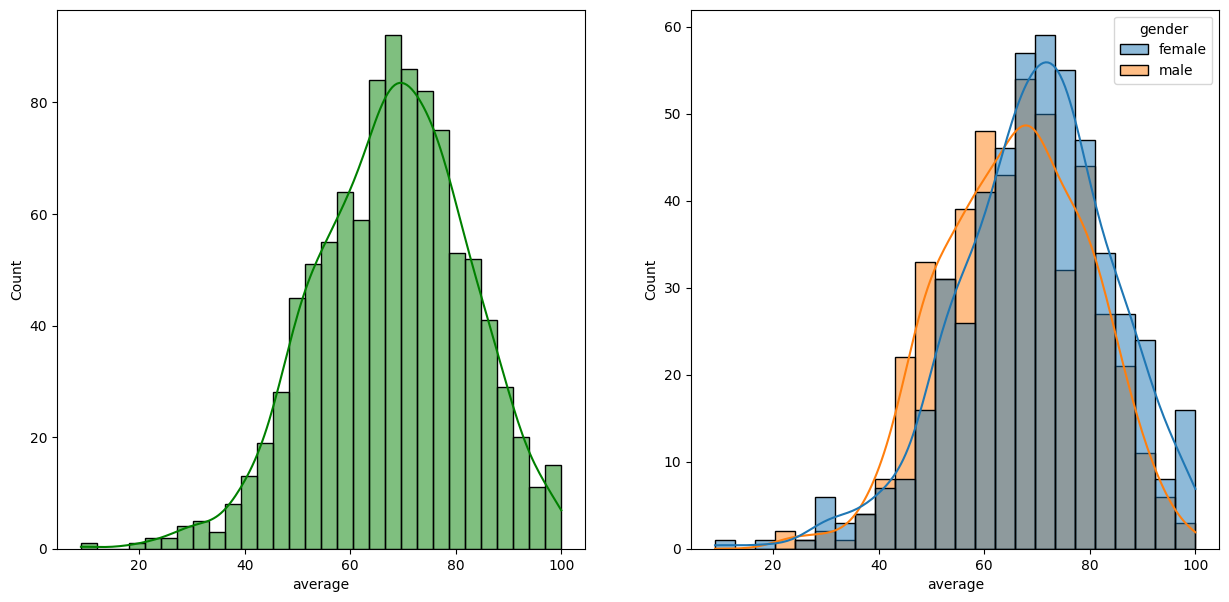

In [ ]:
fig, axs =plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average',kde=True, hue='gender')
plt.show()

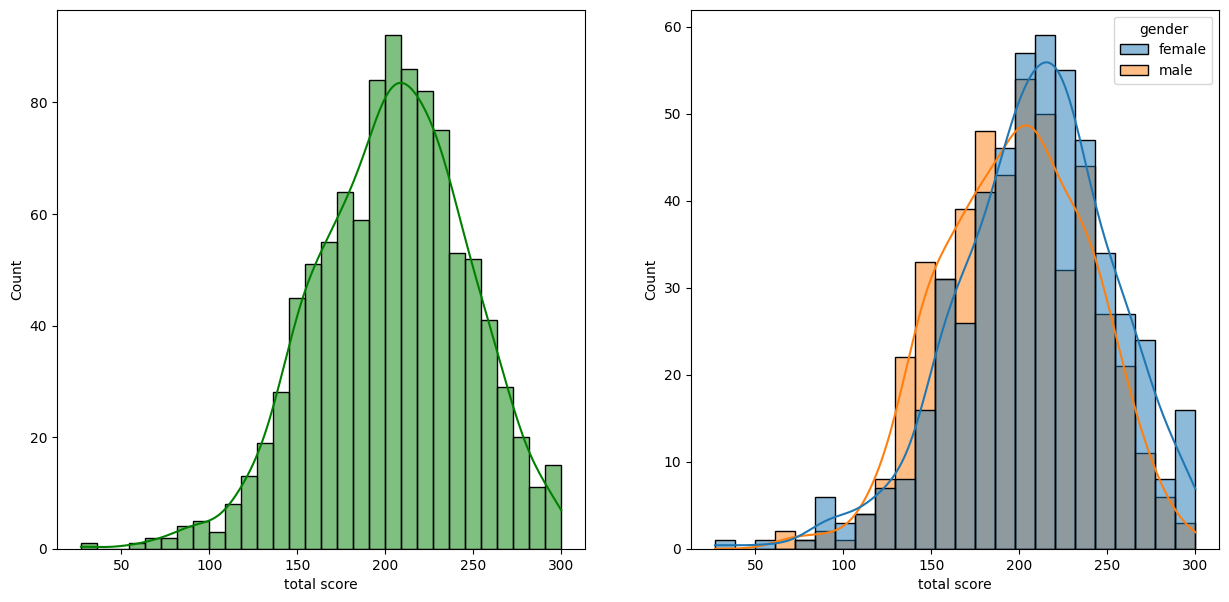

In [ ]:
fig, axs= plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='total score', bins=30, kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

**Insights**

Female students tends to perform well than male students

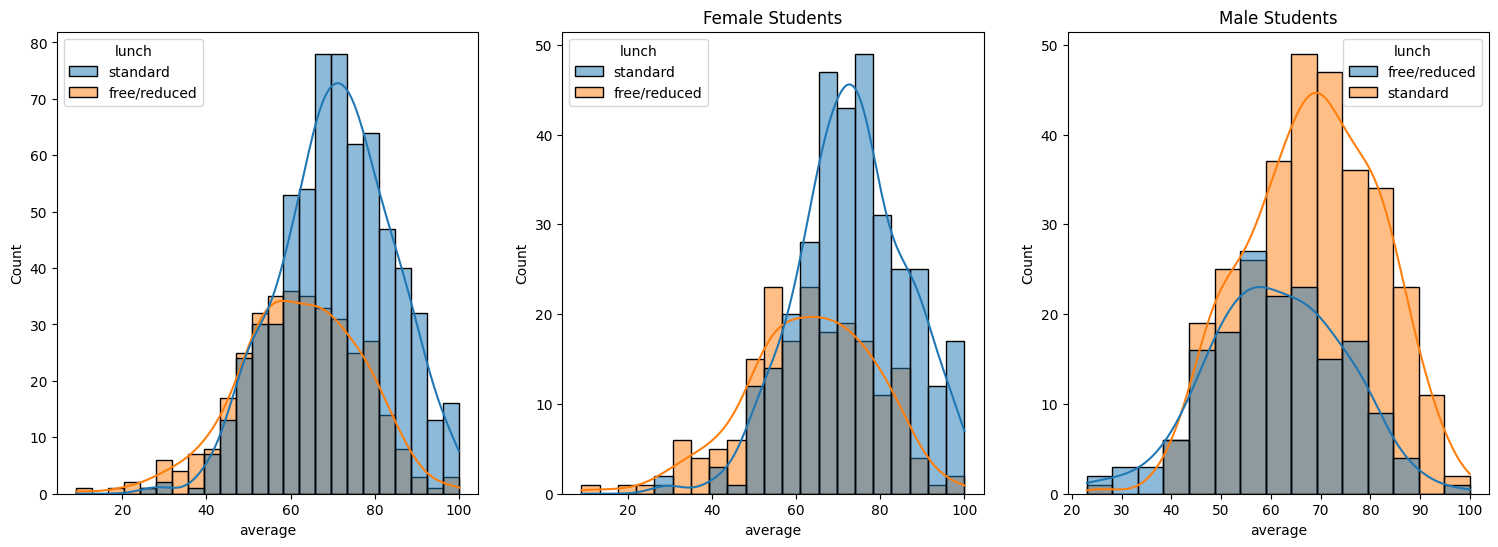

In [ ]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.title("Female Students")
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.title("Male Students")
plt.show()


**Insights**

standard lunch helps perform well for both male and female

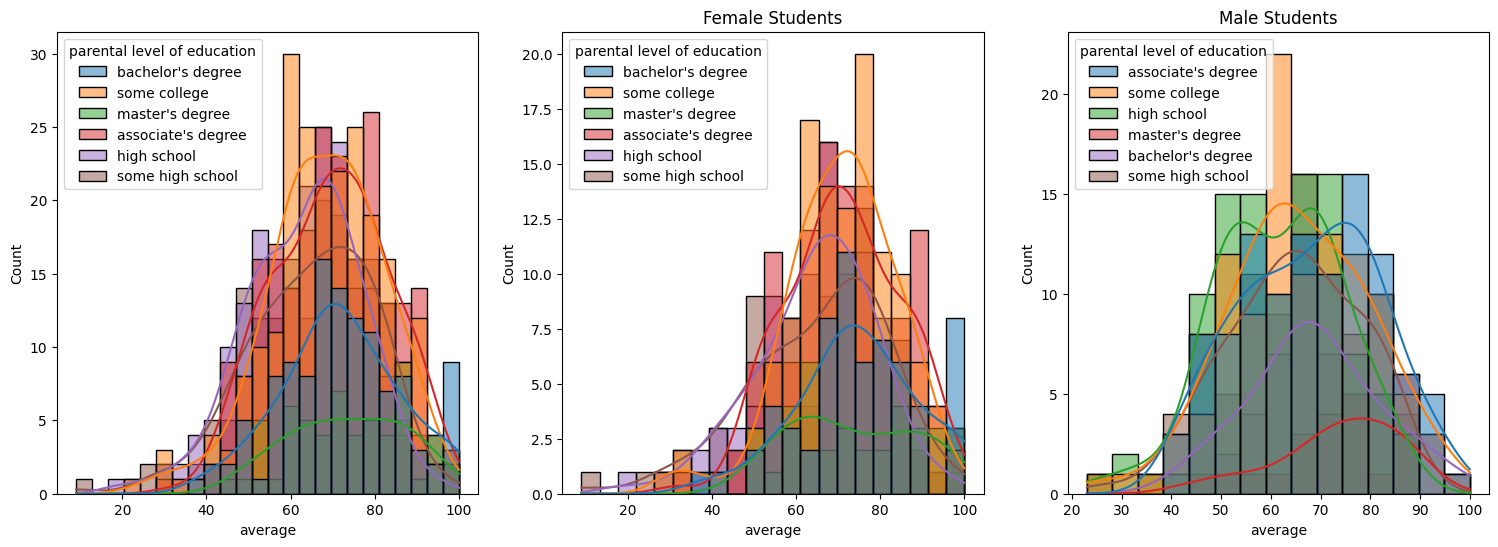

In [ ]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='average',kde=True,hue='parental level of education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.title("Female Students")
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')
plt.title("Male Students")
plt.show()

**Insights**

In general parent's education don't help student perform
well in exam.

2nd plot we can see there is no effect of parent's education on female students

3rd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam

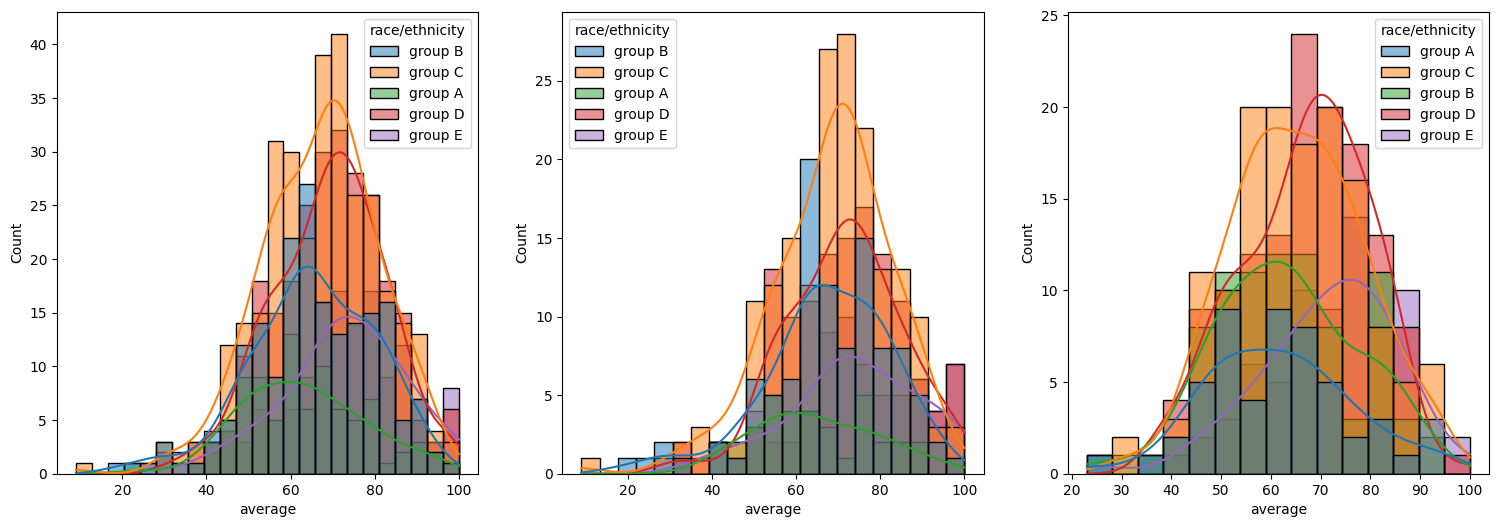

In [ ]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race/ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')
plt.show()

**Insights**

Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

**4.2** Maximum score of students in all three subjects

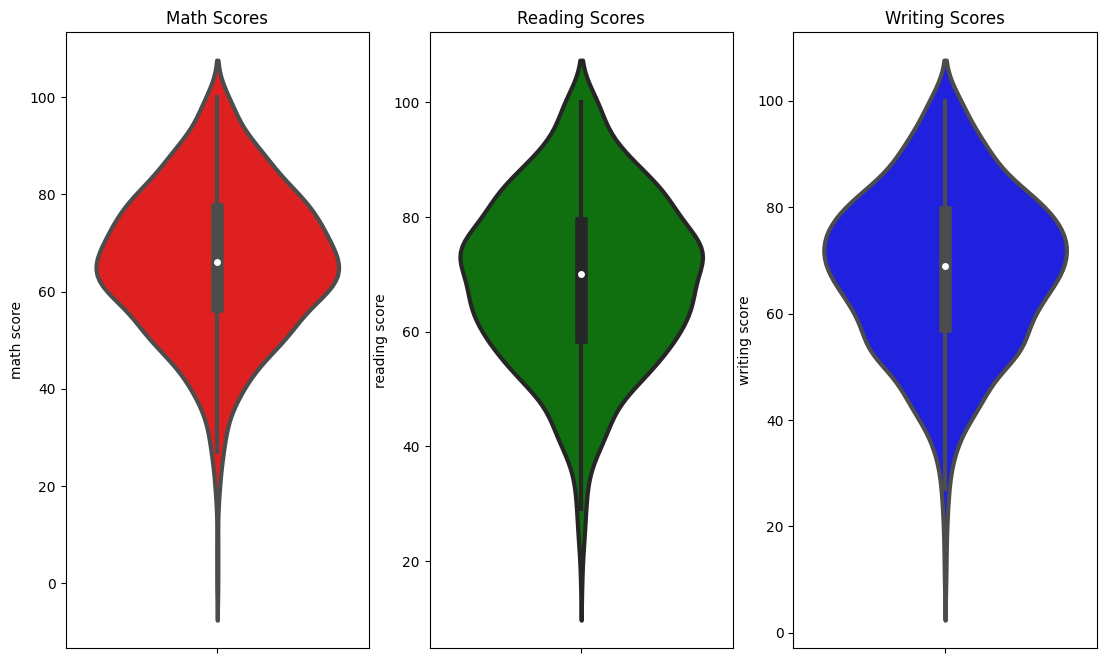

In [ ]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title("Math Scores")
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1,4,2)
plt.title("Reading Scores")
sns.violinplot(y="reading score",data=df,color='green',linewidth=3)
plt.subplot(1,4,3)
plt.title("Writing Scores")
sns.violinplot(y="writing score",data=df,color='blue',linewidth=3)
plt.show()

**Insights**

From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

**4.3-Multivariate analysis using pie-plot**

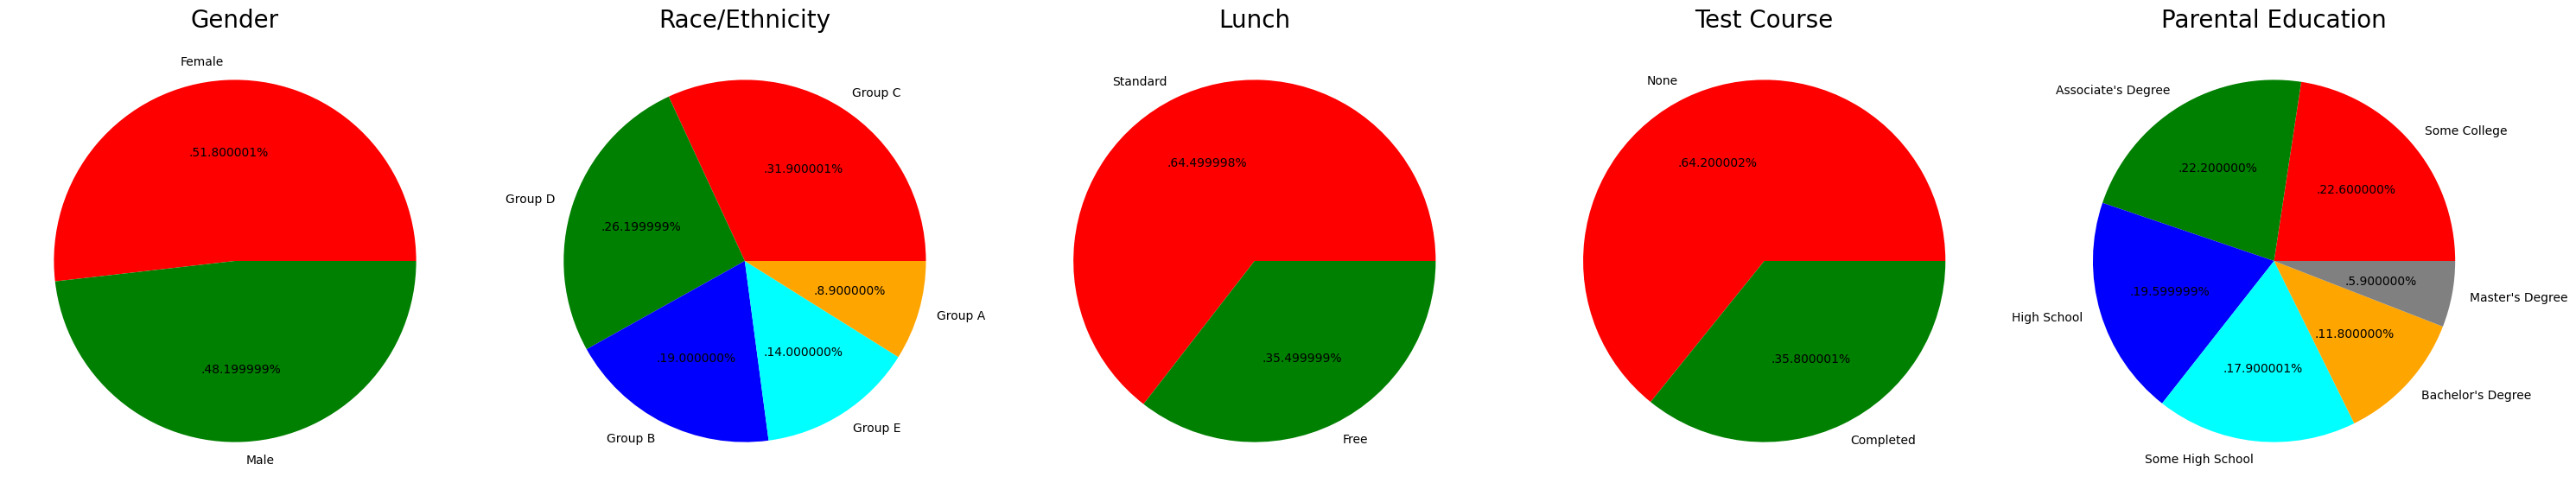

In [ ]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

**Insights**

Number of Male and Female students is almost equal

Number students are greatest in Group C

Number of students who have standard lunch are greater

Number of students who have not enrolled in any test preparation course is greater

Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"


**4.4 Feature Wise Visualization**

**4.4.1-Gender**
*   How is distribution of Gender?
*   is gender has any impact on student's performance


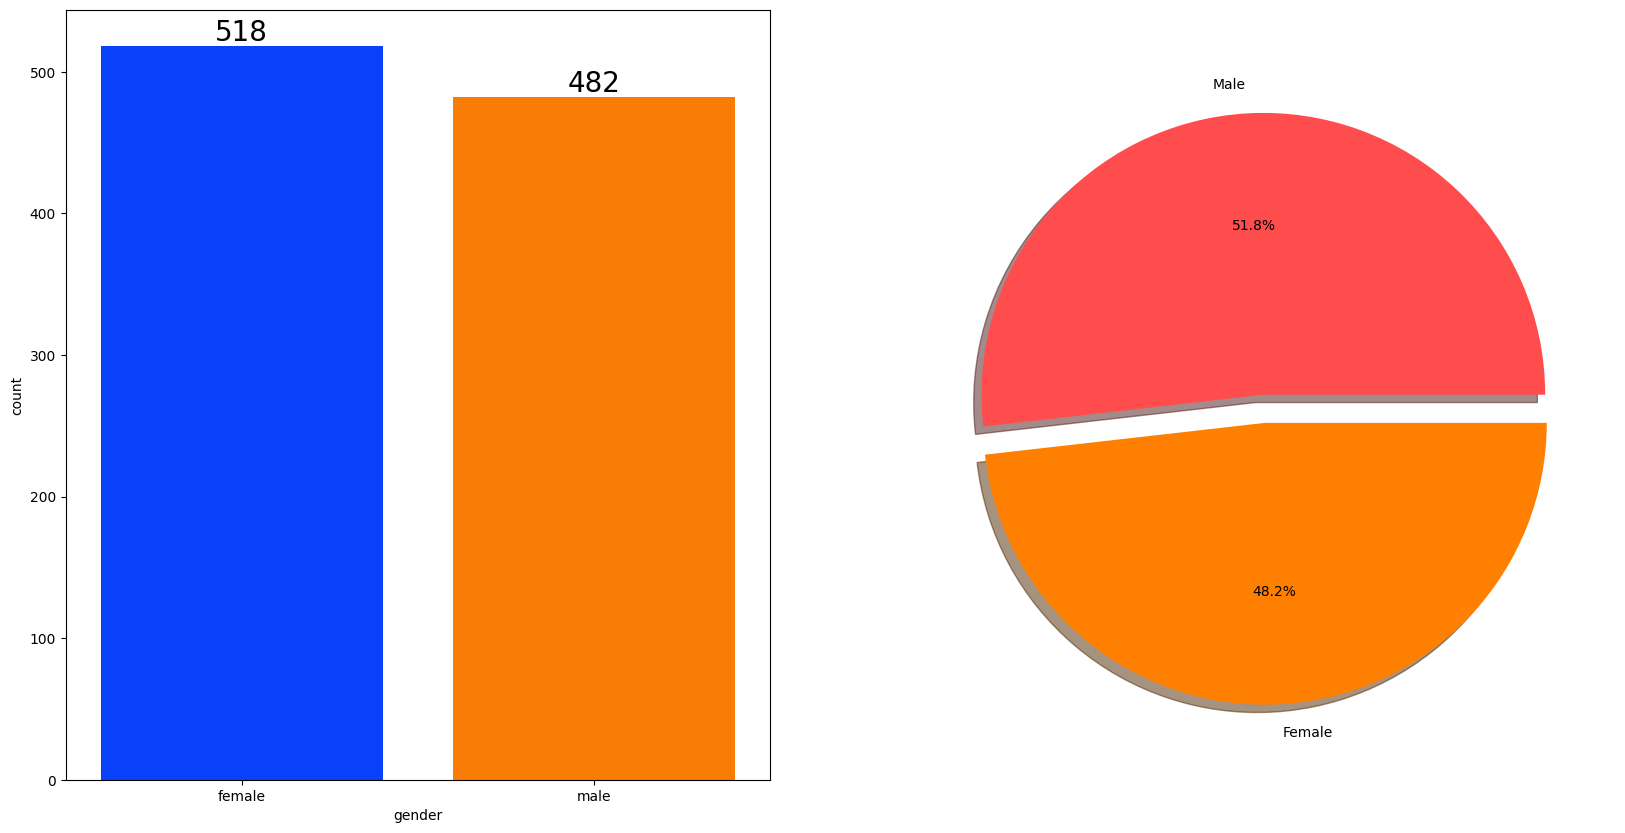

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

**Insights**

Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)


**BIVARIATE ANALYSIS** ( Is gender has any impact on student's performance ? )

In [ ]:
gender_group= df.groupby('gender').mean()
gender_group

,math score,reading score,writing score,total score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


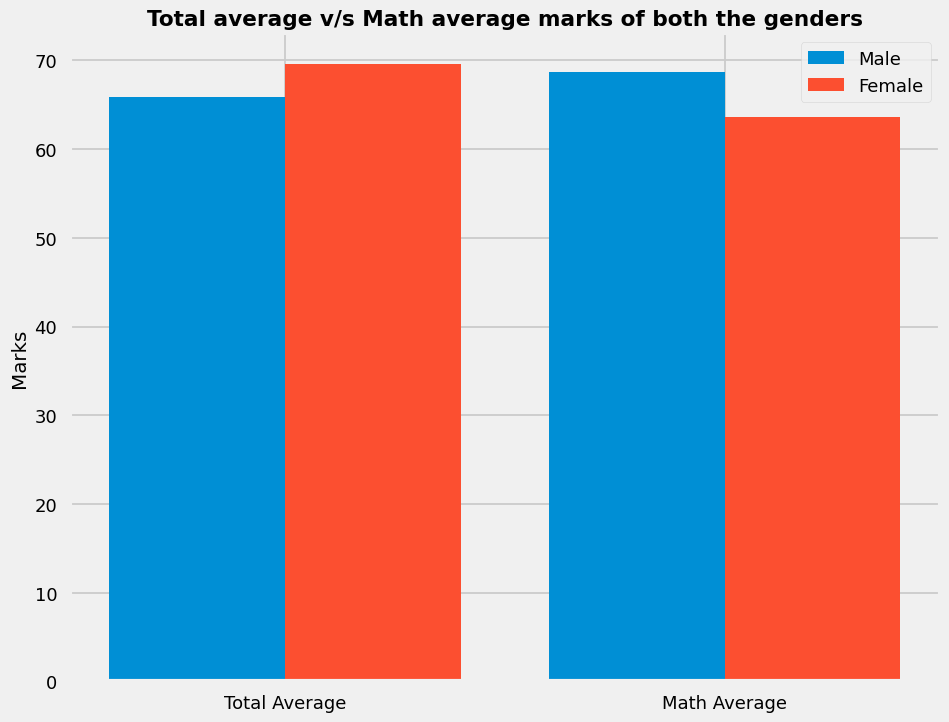

In [ ]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math score'][0]]
male_scores = [gender_group['average'][1], gender_group['math score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

**Insights**

On an average females have a better overall score than men.

whereas males have scored higher in Maths

**4.4.2-RACE/EHNICITY COLUMN**

How is Group wise distribution ?

Is Race/Ehnicity has any impact on student's performance ?

**UNIVARIATE ANALYSIS**( How is Group wise distribution ?)

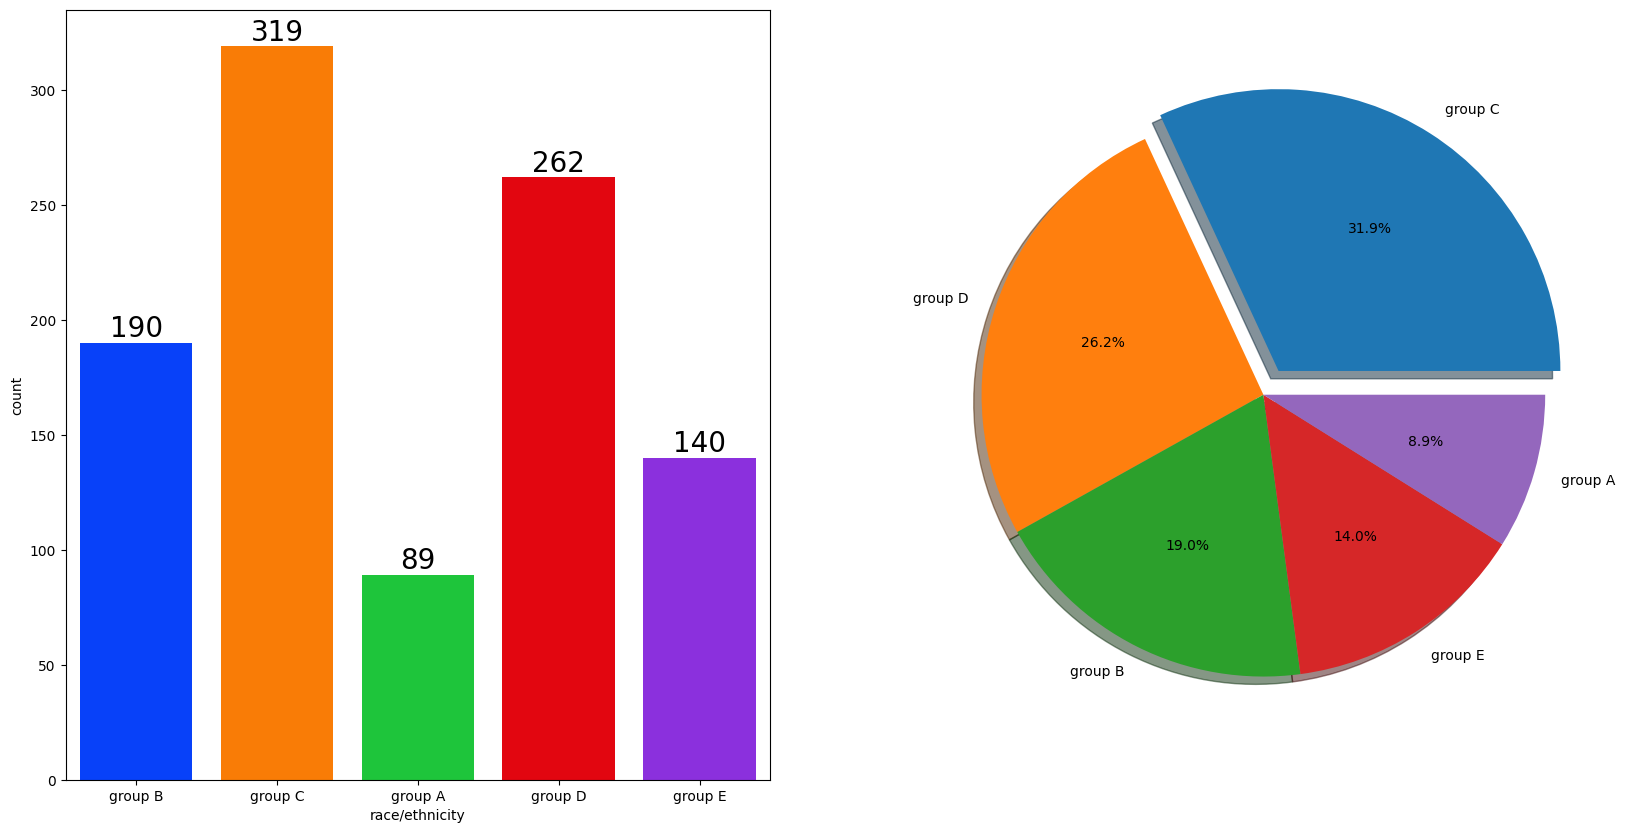

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()

**Insights**

Most of the student belonging from group C /group D.

Lowest number of students belong to groupA.


**BIVARIATE ANALYSIS** ( Is Race/Ehnicity has any impact on student's performance ? )

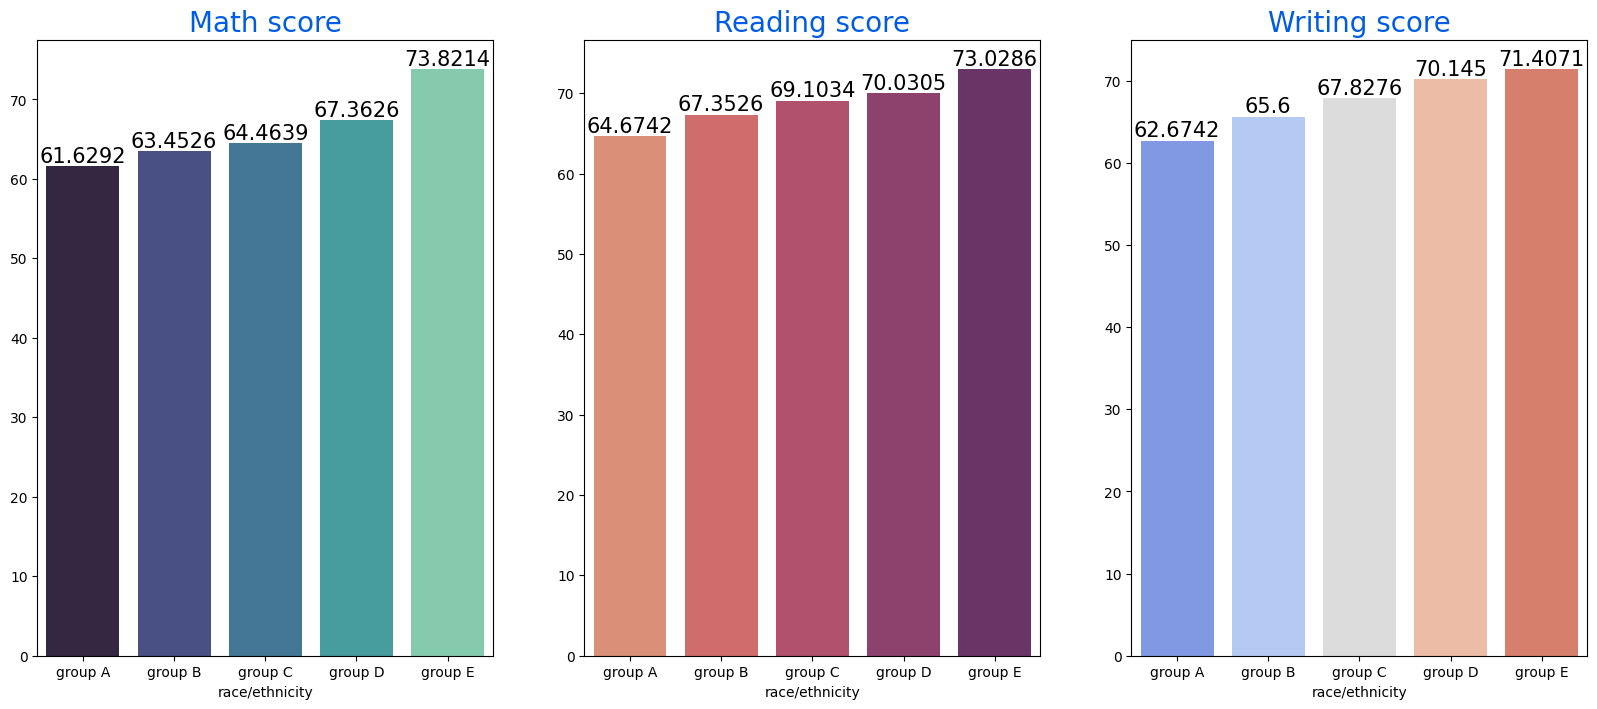

In [ ]:
Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

**Insights**

Group E students have scored the highest marks.

Group A students have scored the lowest marks.

Students from a lower Socioeconomic status have a lower avg in all course subjects

**4.4.3 PARENTAL LEVEL OF EDUCATION COLUMN**

What is educational background of student's parent ?

Is parental education has any impact on student's performance ?

**UNIVARIATE ANALYSIS** ( What is educational background of student's parent ? )

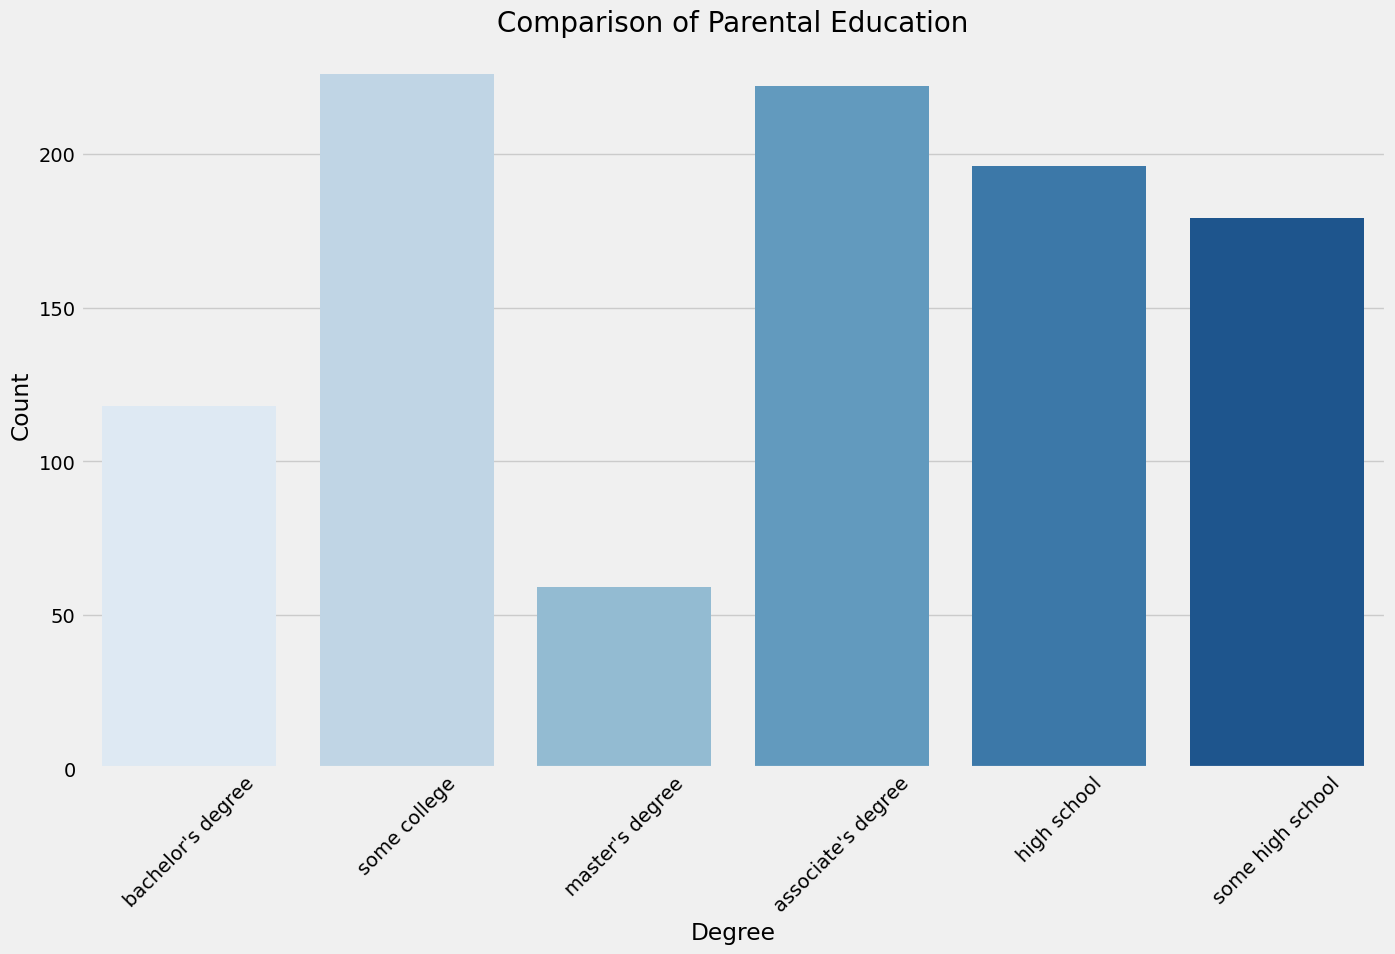

In [ ]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

sns.countplot(x='parental level of education', data=df, palette='Blues')
plt.title('Comparison of Parental Education', fontweight=30, fontsize=20)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

**Insights**

Largest number of parents are from some college.

**BIVARIATE ANALYSIS** ( Is parental education has any impact on student's performance ? )

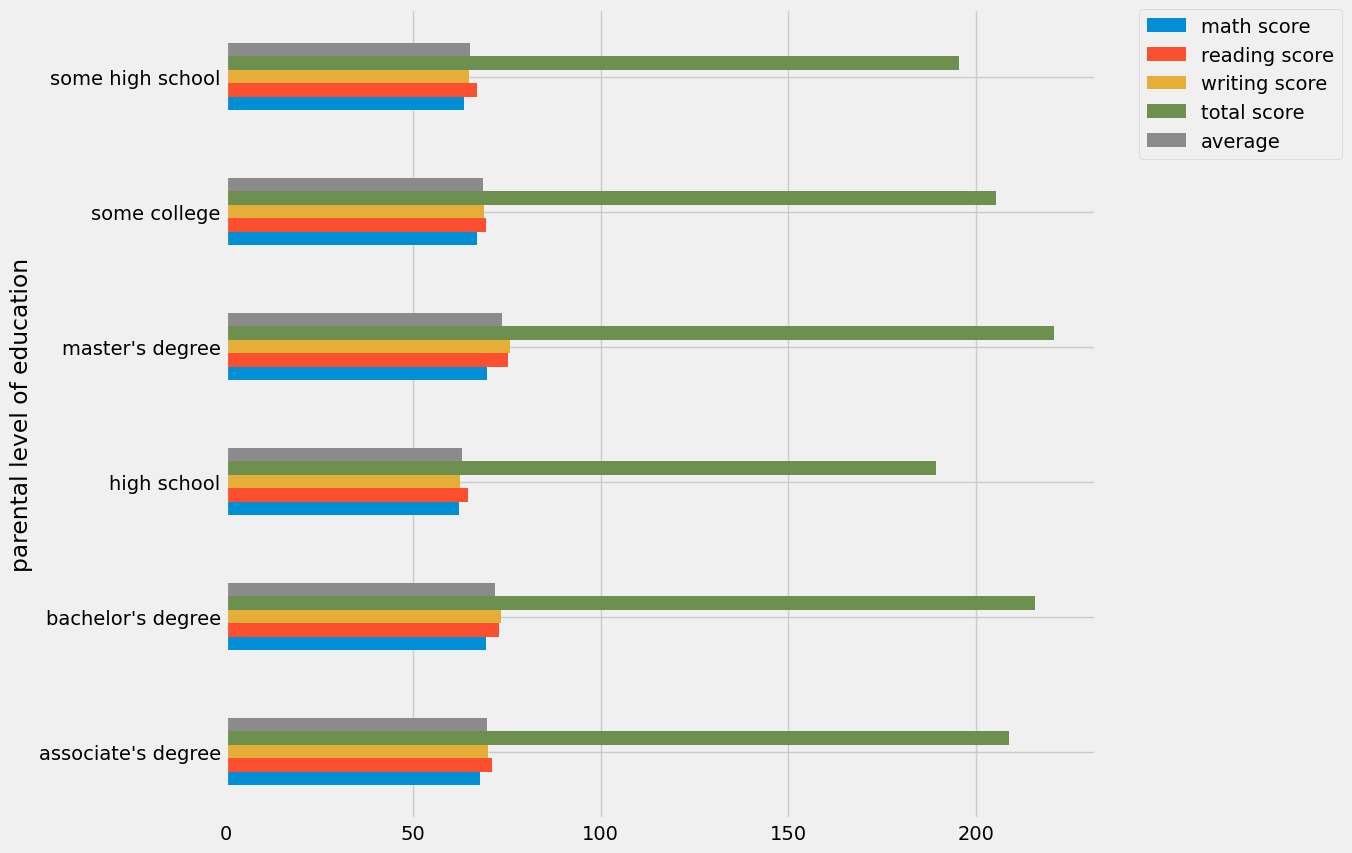

In [ ]:
df.groupby('parental level of education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

**Insights**

The score of student whose parents possess master and bachelor level education are higher than others.

**4.4.4 LUNCH COLUMN**

Which type of lunch is most common amoung students ?

What is the effect of lunch type on test results?


**UNIVARIATE ANALYSIS** ( Which type of lunch is most common amoung students ? )

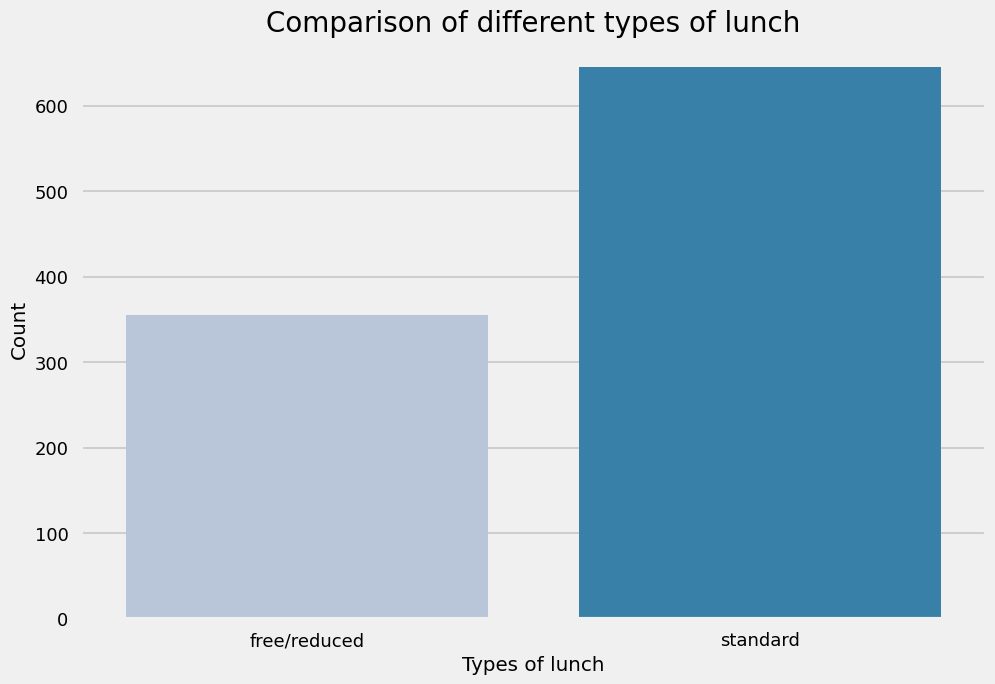

In [ ]:
df['lunch'] = df['lunch'].astype('category')

plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')

sns.countplot(data=df, x='lunch', palette='PuBu')
plt.title('Comparison of different types of lunch', fontweight=30, fontsize=20)
plt.xlabel('Types of lunch')
plt.ylabel('Count')
plt.show()

**Insights**

Students being served Standard lunch was more than free lunch

**BIVARIATE ANALYSIS** ( Is lunch type intake has any impact on student's performance ? )

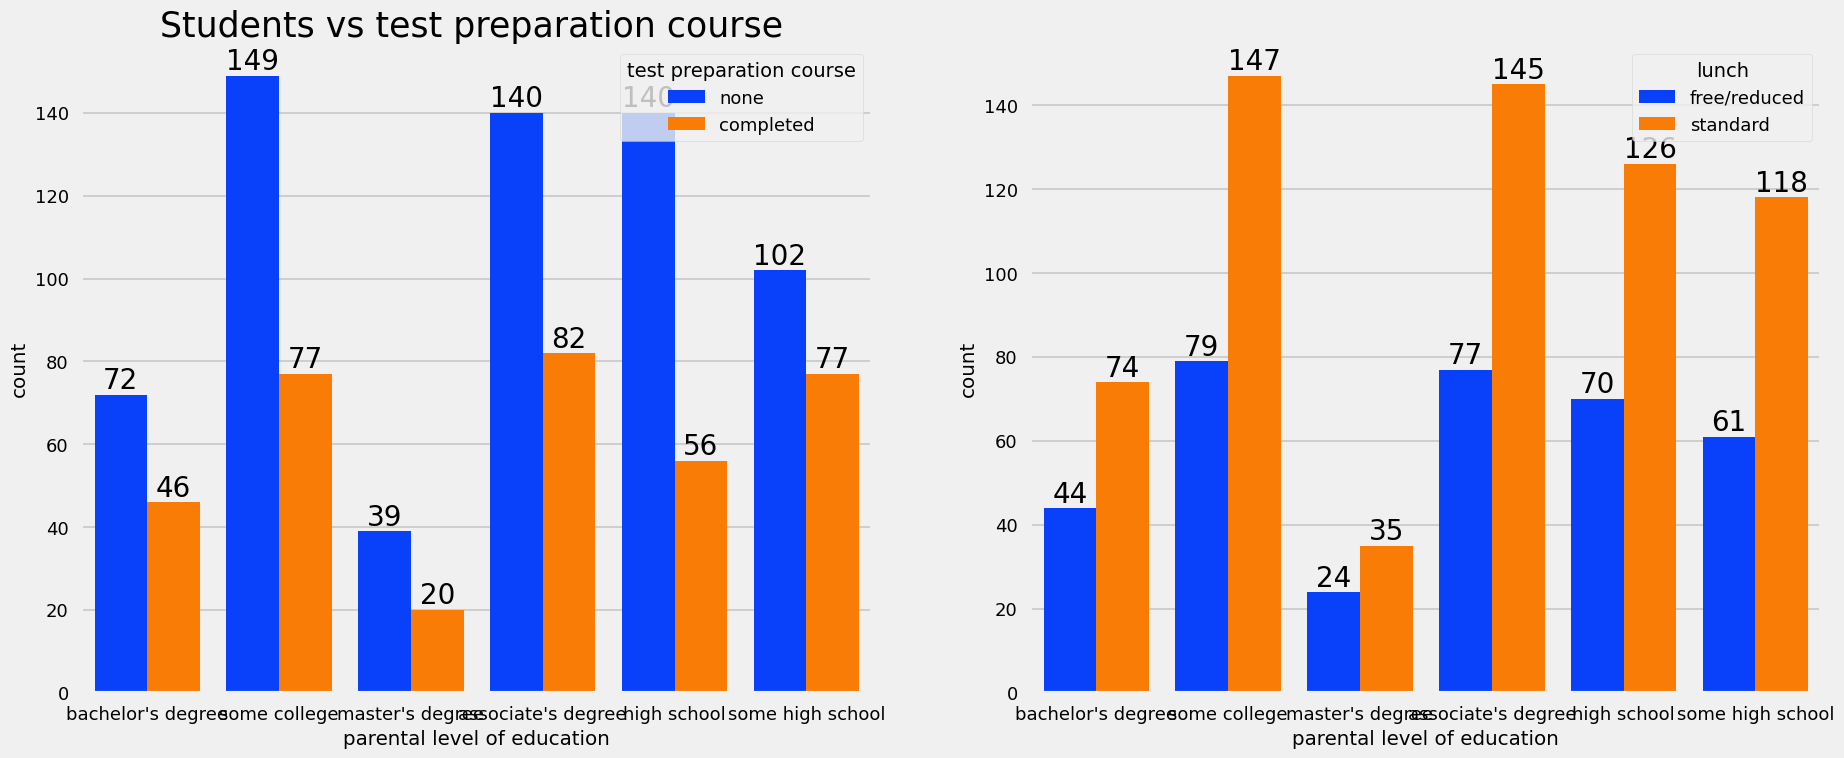

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)

**Insights**

Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

**4.4.5 TEST PREPARATION COURSE COLUMN**

Which type of lunch is most common amoung students ?

Is Test prepration course has any impact on student's performance ?

**BIVARIATE ANALYSIS** ( Is Test prepration course has any impact on student's performance ? )

<Axes: xlabel='lunch', ylabel='writing score'>

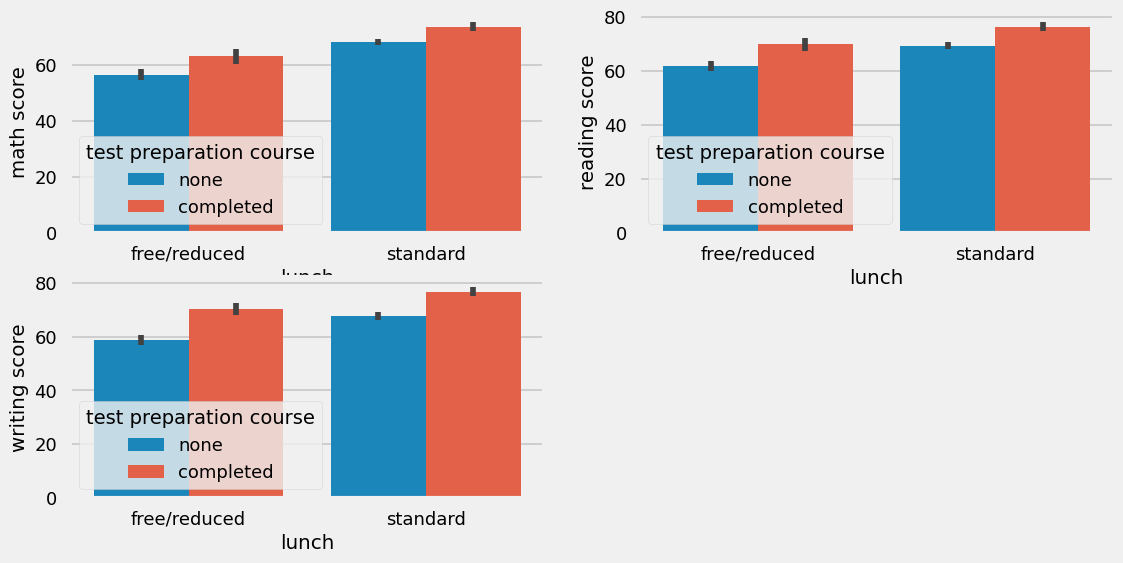

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])

**Insights**

Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course


**4.4.6 CHECKING OUTLIERS**

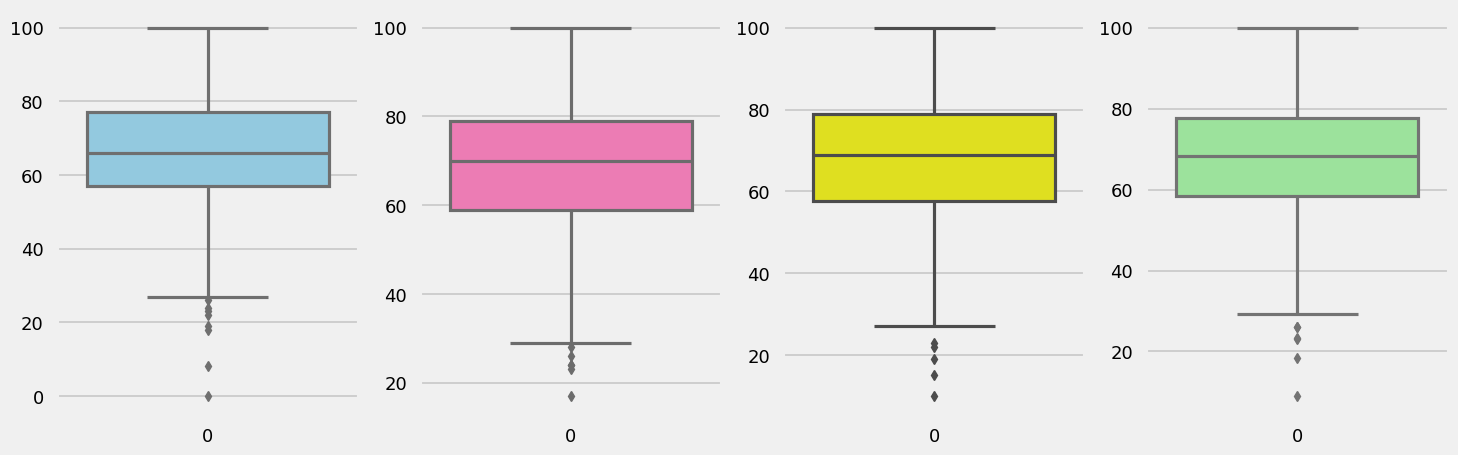

In [ ]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

**4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT**

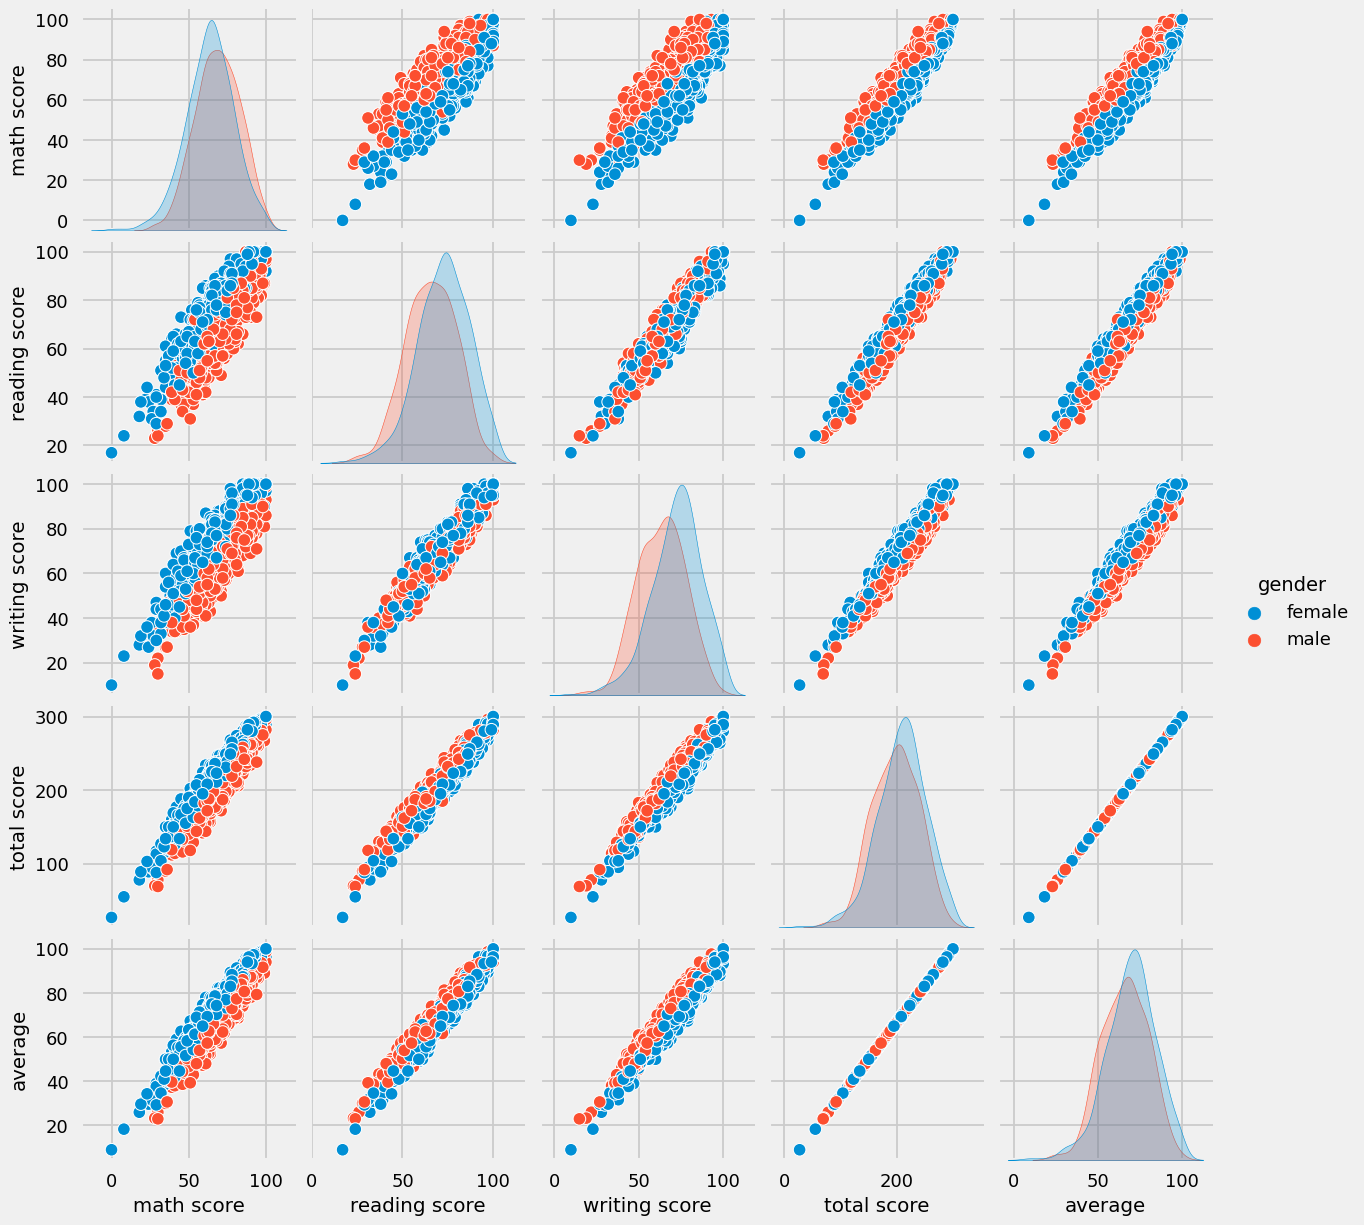

In [ ]:
sns.pairplot(df,hue = 'gender')
plt.show()

**Insights**

From the above plot it is clear that all the scores increase linearly with each other.


**5. Conclusions**

Student's Performance is related with lunch, race, parental level education

Females lead in pass percentage and also are top-scorers

Student's Performance is not much related with test preparation course

Finishing preparation course is benefitial.

**Model Training**

**1.1 Import Data and Required Packages**

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 5.0 MB/s eta 0:00:00


In [ ]:
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [ ]:
df.rename(columns={'reading score': 'reading_score',
                   'writing score': 'writing_score',
                   'math score': 'math_score',
                   'parental level of education': 'parental_level_of_education',
                   'race/ethnicity': 'race_ethnicity',
                   'test preparation course': 'test_preparation_course'}, inplace=True)


**Preparing X and Y variables**

In [ ]:
X = df.drop(columns=['math_score'],axis=1)

In [ ]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,74,218,72.666667
1,female,group C,some college,standard,completed,90,88,247,82.333333
2,female,group B,master's degree,standard,none,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,57,44,148,49.333333
4,male,group C,some college,standard,none,78,75,229,76.333333


In [ ]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental_level_of_education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental_level_of_education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard', 'free/reduced']
Categories (2, object): ['free/reduced', 'standard']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [ ]:
Y=df['math_score']

In [ ]:
Y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [ ]:
# Create Column Transformer with 3 types of transformers
# List of numeric column names
num_features = ['reading_score', 'writing_score']

# List of categorical column names
cat_features = ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),
    ],
    remainder='passthrough'  # Keep any other columns not explicitly specified
)



In [ ]:
X = preprocessor.fit_transform(X)

ValueError: ignored

In [ ]:
X.shape

(1000, 21)

In [ ]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 21), (200, 21))

**Create an Evaluate Function to give all metrics after model Training**

In [ ]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000


Lasso
Model performance for Training set
- Root Mean Squared Error: 4.5635
- Mean Absolute Error: 3.6187
- R2 Score: 0.9076
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 4.5356
- Mean Absolute Error: 3.6341
- R2 Score: 0.9155


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.1495
- Mean Absolute Error: 0.1201
- R2 Score: 0.9999
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.1508
- Mean Absolute Error: 0.1184
- R2 Score: 0.9999


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 3.6831
- Mean Absolute Error: 2.9185
- R2 Score: 0.9398
-----------------------

**Results**

In [ ]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
0,Linear Regression,1.000000
2,Ridge,0.999906
6,XGBRegressor,0.975402
7,CatBoosting Regressor,0.968100
5,Random Forest Regressor,0.965312
4,Decision Tree,0.935316
8,AdaBoost Regressor,0.922149
1,Lasso,0.915461
3,K-Neighbors Regressor,0.900535


**Linear Regression**

In [ ]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 100.00


**Plot y_pred and y_test**

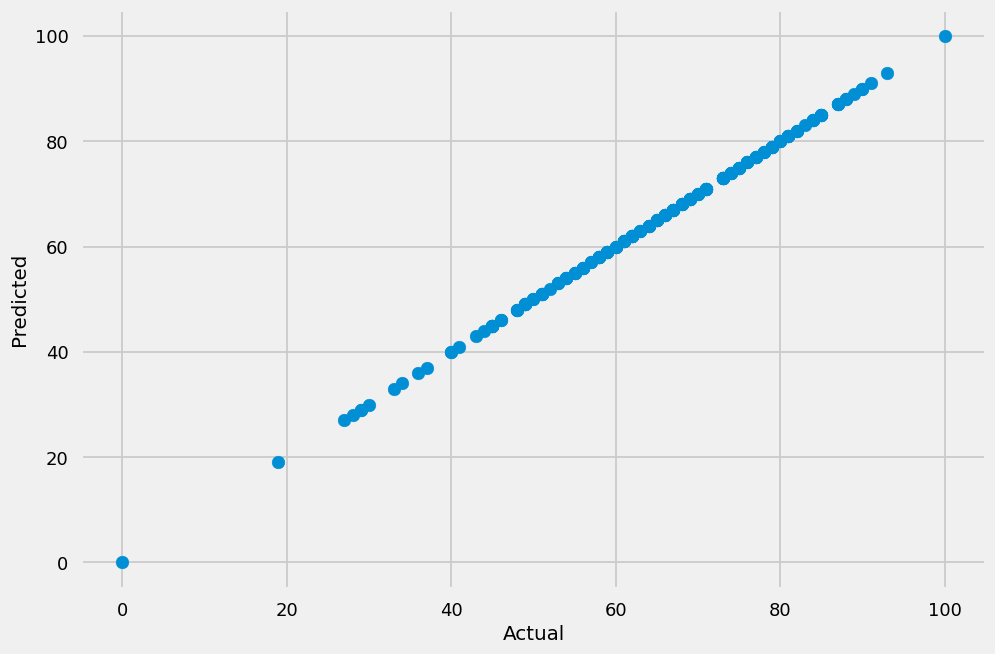

In [ ]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

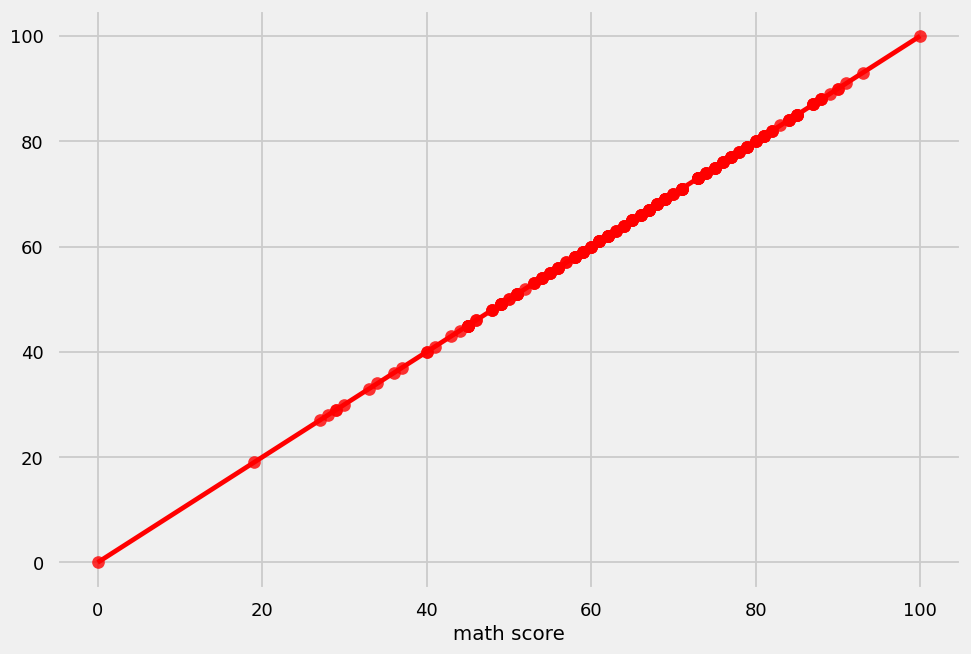

In [ ]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

**Difference between Actual and Predicted Values**

In [ ]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,91.0,-2.842171e-14
737,53,53.0,2.842171e-14
740,80,80.0,2.842171e-14
660,74,74.0,0.000000e+00
411,84,84.0,0.000000e+00
...,...,...,...
408,52,52.0,5.684342e-14
332,62,62.0,5.684342e-14
208,74,74.0,0.000000e+00
613,65,65.0,-2.842171e-14
